In [18]:
import numpy as np
from matplotlib import pyplot as plt

np. set_printoptions(suppress=True)

In [19]:
LENGTH = 2**6
LIMITS = (-8,8)
STEP = 2*LIMITS[1]/LENGTH
Q_INT = 4
Q_FRAC = 12


A_COEF_SIZE = 16
A_Q_INT = Q_INT
A_Q_FRAC = Q_FRAC

B_COEF_SIZE = 16
B_Q_INT = Q_INT
B_Q_FRAC = Q_FRAC


sigmoid = lambda x: 1/(1+np.exp(-x))
tanh = lambda x: 2/(1+np.exp(-2*x))-1
sin = lambda x: 0.2*np.sin(x)

x = np.arange(*LIMITS, step=STEP)
fx = sigmoid


## Interpolation

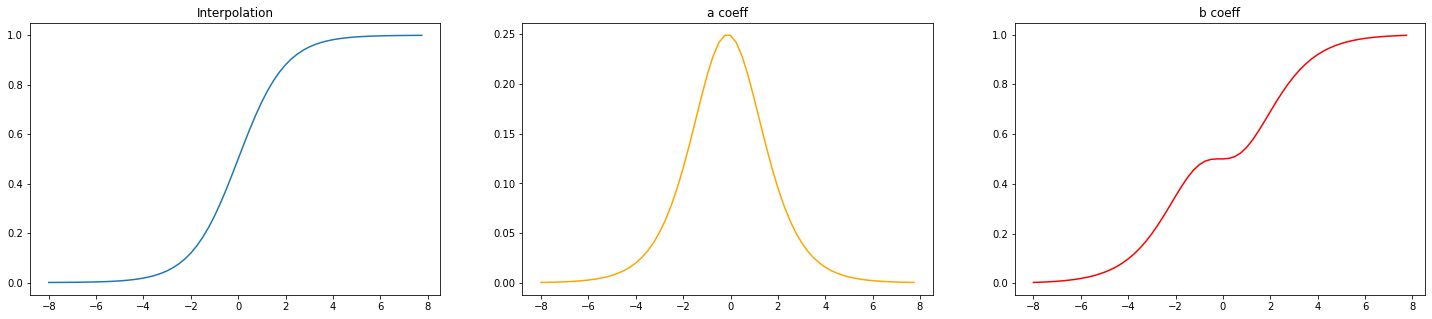

In [20]:
a = (fx(x+STEP)-fx(x))/STEP
b = fx(x)-a*x
yl = a*x+b

fig, plts = plt.subplots(1, 3, figsize=(25,5))

plts[0].set_title('Interpolation')
plts[0].plot(x,yl, '-')
plts[1].set_title('a coeff')
plts[1].plot(x,a, color='orange')
plts[2].set_title('b coeff')
plts[2].plot(x,b, color='red')

In [21]:
d = {x : (a,b) for x,a,b in zip(x,a,b)}

AssertionError: 

## Clipping

In [ ]:
a = np.clip(a, -2**(A_Q_INT-1), 2**(A_Q_INT-1)-2**(-A_Q_INT))
b = np.clip(b, -2**(B_Q_INT-1), 2**(B_Q_INT-1)-2**(-B_Q_INT))

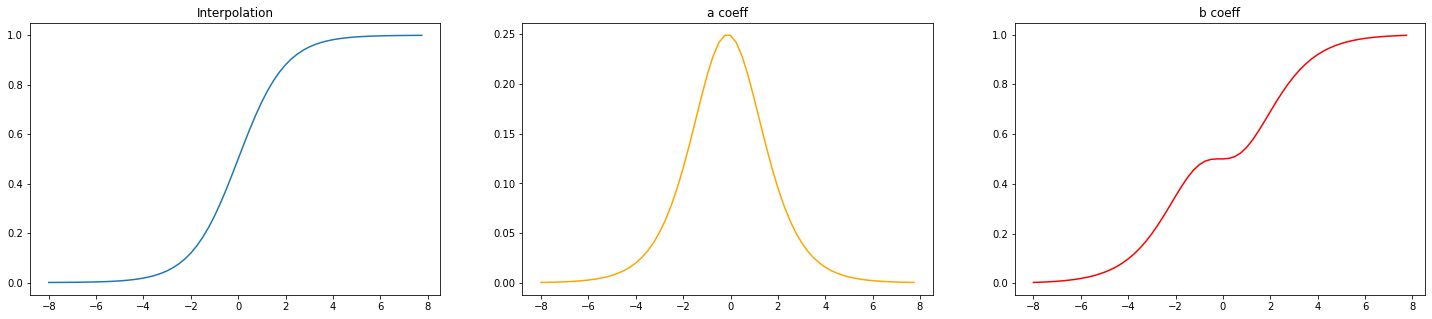

In [ ]:
fig, plts = plt.subplots(1, 3, figsize=(25,5))

plts[0].set_title('Interpolation')
plts[0].plot(x,yl)
plts[1].set_title('a coeff')
plts[1].plot(x,a, color='orange')
plts[2].set_title('b coeff')
plts[2].plot(x,b, color='red')

In [ ]:
def to_fx(x, q_int, q_frac):
    assert -2**(q_int-1) <= x <= 2**(q_int-1)-2**(-q_frac)
    if x >= 0:
        return int(round(x*2**q_frac))
    else:
        return int(round(x*2**q_frac+2**(q_frac+q_int)))

In [ ]:
v = [to_fx(a, A_Q_INT, A_Q_FRAC)*2**B_COEF_SIZE + to_fx(b, B_Q_INT, B_Q_FRAC) for a,b in zip(a,b)]
#signed
v = list(v[32:64]) + list(v[0:32])

In [ ]:
def list_to_mem(l, filename):
    with open(filename, 'w') as f:
        f.write('//format=mti addressradix=d dataradix=d version=1.0 wordsperline=1\n')
        for i, x in enumerate(l):
            f.write(f'{i}: {int(x)}\n')

list_to_mem(v,'../../src/memories/act_func.mem')